# Λ-Type Three-Level: Weak Pulse with Time-Dependent Coupling in a Cloud — Storage and Retrieval

Time taken to solve this problem on a 2013 MacBook Pro:
**2h 32min 15s**

## Define the Problem

In [1]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      { "channels": [[0,1], [1,2]], 
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl_1": 1.0,
             "centre_1": 0.0,
             "fwhm_1": 1.0
          },
        "rabi_freq_t_func": "gaussian_1"
      },
      {
        "coupled_levels": [[1, 2]],
        "detuning": 0.0,
        "detuning_positive": false,
        "label": "coupling",
        "rabi_freq": 5.0,
        "rabi_freq_t_args": 
        {
          "ampl_2": 1.0,
          "fwhm_2": 0.2,
          "off_2": 4.0, 
          "on_2": 6.0
          },
        "rabi_freq_t_func": "ramp_offon_2"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 12.0,
  "t_steps": 140,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 50,
  "num_density_z_func": "gaussian_1",
  "num_density_z_args": {
    "ampl_1": 1.0,
    "fwhm_1": 0.5,
    "centre_1": 0.5
  },
  "interaction_strengths": [1.0e3, 1.0e3],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling-store" 
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

## Solve the Problem

In [3]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 2.77 ms, sys: 7.44 ms, total: 10.2 ms
Wall time: 12.1 ms


## Plot Output

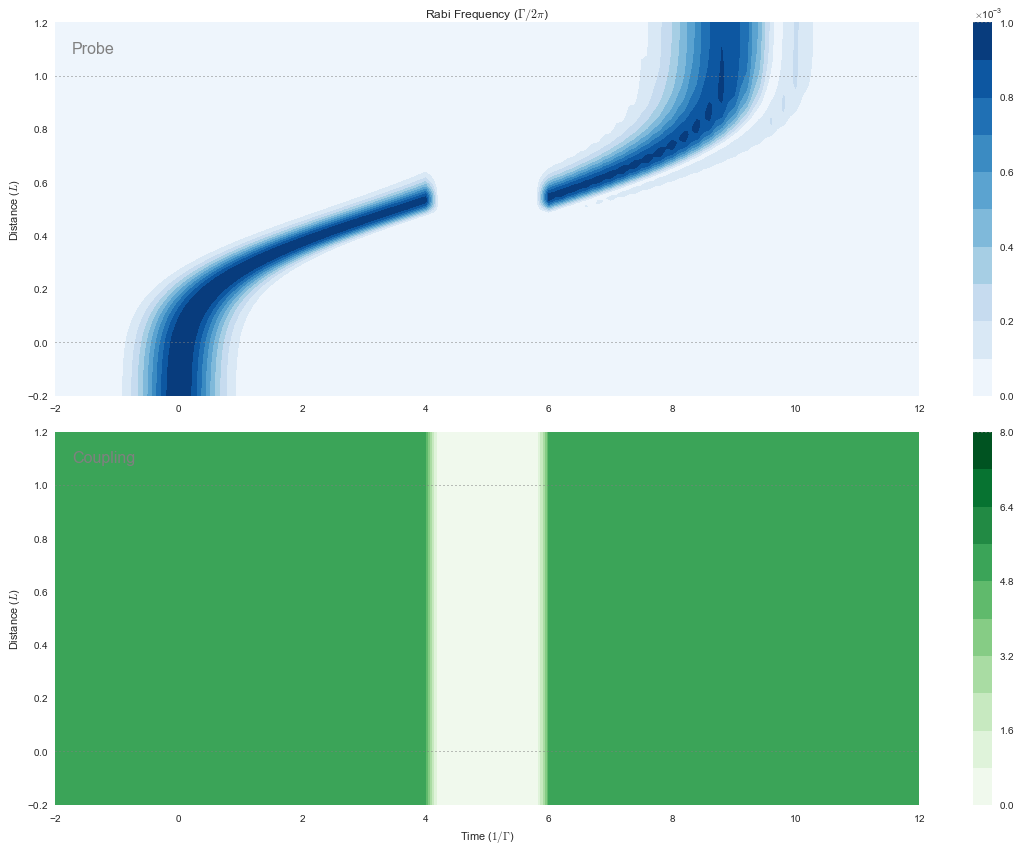

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig = plt.figure(1, figsize=(16, 12))

# Probe 
ax = fig.add_subplot(211)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Probe',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(212)
cmap_range = np.linspace(0.0, 8.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Both
for ax in fig.axes:
    for y in [0.0, 1.0]:
        ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.tight_layout()
plt.savefig('images/mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling-store.png')

## Analysis

From my [thesis](https://github.com/tommyogden/phd-thesis), §4.3.3.

> We see that the effect is that the pulse envelope vanishes as the coupling field is ramped down, but returns dramatically, with the same profile, as the coupling field is ramped back up. It appears as though the light has been ‘stopped’ by the medium before being allowed to continue on its way.

> We can understand this behaviour by considering the propagation of the dark state polariton in this system. Ramping down the driving field envelope once the pulse is in the medium equates to rotating the mixing angle $\theta \rightarrow \pi/2$ such that it is coherently mapped on to the spin wave. At a time later we ramp up the driving field, rotating the mixing angle back to its previous position, and the field continues on its way.

> Although the storage and retrieval of dark-state polaritons is often described as ‘stopping light’, we must be careful to note that it is really a coherent transfer of energy to the medium. No elecromagnetic field envelope remains at the limit $\theta = \pi/2$, so the light itself is not ‘stopped’, it has been transferred into a spin excitation.

>It is important to consider the limitations of these techniques. First, for eit and associated slow light effect, the duration of the pulse tw must be greater than the reciprocal of the eit bandwidth, so that spectrally
it propagates in the transparency window. Second, for storage of the entire pulse to be possible, the spatial extent of the pulse must be compressed below the length $L$ of the medium, which is possible only if the medium has a sufficiently large optical depth such that $NgL \gg 1$. 